## READING THE DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('/content/rank_salary.csv')
data

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000
5,Professor,6,150000
6,Associate Dean,7,200000
7,Dean,8,300000
8,Vice Chancellor,9,500000
9,Chancellor,10,1000000


In [ ]:
data.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

## SEPARATING X(INPUT) AND Y(OUTPUT) DATA

In [ ]:
x=data.iloc[:,1:2].values
y=data.iloc[:,2:].values
x
print(x.ndim)
y
print(y.ndim)

2
2


In [ ]:
data.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

## TRYING THE SIMPLE LINEAR REGRESSION FIRST:

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

pred=model.predict(x)
pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

## PLOTTING IT (ITS A STRAIGHT LINE)

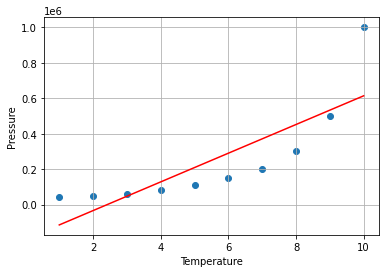

In [ ]:
plt.scatter(x,y)
plt.plot(x,pred,color='r')
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.grid()

## IMPLEMENTING POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures 
poly=PolynomialFeatures(degree=3) 
X=poly.fit_transform(x)
X

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [ ]:
from sklearn.linear_model import LinearRegression
poly.fit(X,y)
mod=LinearRegression()
mod.fit(X,y)

prediction1=mod.predict(X)
prediction1

array([[ 14902.0979021 ],
       [ 78759.9067599 ],
       [ 94960.37296037],
       [ 88223.77622377],
       [ 83270.39627039],
       [104820.51282051],
       [177594.40559441],
       [326312.35431236],
       [575694.63869464],
       [950461.53846154]])

## PLOTTING THE RESULT

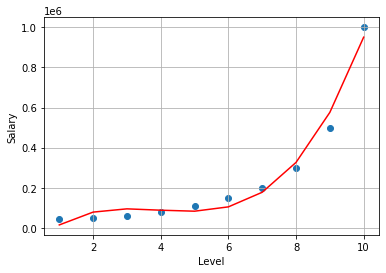

In [ ]:
plt.scatter(x,y)
plt.plot(x,prediction1,color='r')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.grid()

## MODEL EVALUATION USING r2 score (MORE ACCURACY IN THE POLYNOMIAL MODEL)

In [ ]:
from sklearn.metrics import r2_score
print('POLYNOMIAL REGRESSION',r2_score(y,prediction1))

print('SIMPLE REGRESSION',r2_score(y,pred))

POLYNOMIAL REGRESSION 0.9812097727913367
SIMPLE REGRESSION 0.6690412331929895
